# Regression
## Linear Regression
簡單產生一些資料點，用linear regression來測試看看

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/matplotlib-1.5.0-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


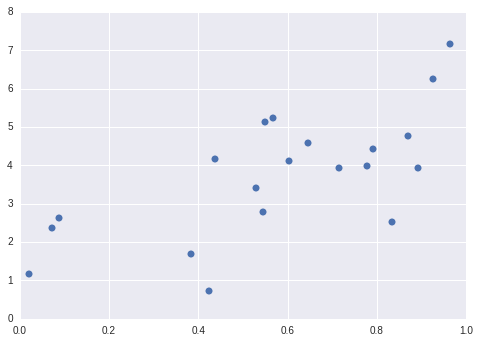

In [1]:
# Create some simple data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

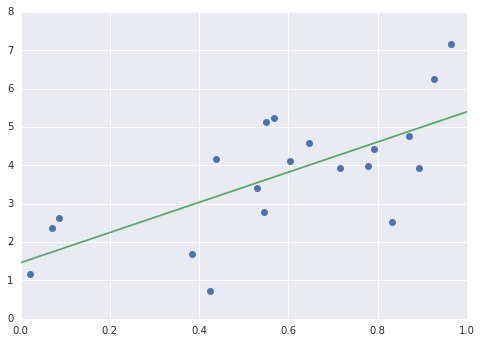

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

也可以用其他複雜的model來試看看

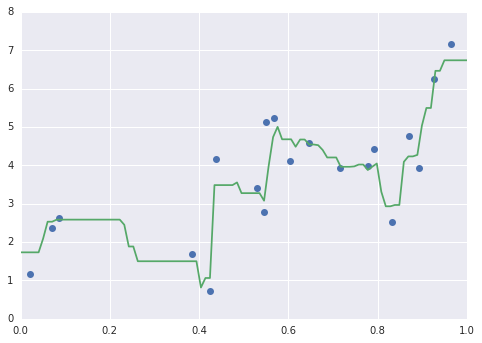

In [8]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

## Logistic Regression

接下來討論logistic regression的範例用法，將使用iris 資料庫來比較 L1 logistic, L2 logistic, Linear SVC等分類器。

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.svm import SVC #前面用過的SVC
from sklearn import datasets 

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # 僅使用前兩個特徵，方便視覺化呈現
y = iris.target

n_features = X.shape[1]

來看看三個鳶尾花的scatter plot (Sepal width 和 Sepal length)

([], <a list of 0 Text yticklabel objects>)

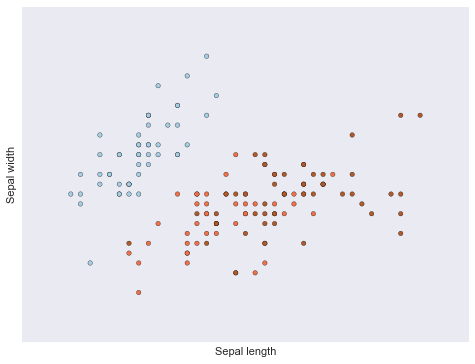

In [10]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [11]:
C = 1.0

# 建構四個分類器

clfs = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
        'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2'),
        'Linear SVC': SVC(kernel='linear', C=C, probability=True, random_state=0),
        'L2 logistic (Multinomial)': LogisticRegression(C=C, solver='lbfgs', multi_class='multinomial')
       }

n_clfs = len(clfs)

而接下來產生一個測試矩陣:

1. ``np.linspace(起始, 終止, 數量)`` 目的為產生等間隔之數據，例如 ``print(np.linspace(1,3,3))`` 的結果為 ``[ 1. 2. 3.]``，而``print(np.linspace(1,3,5))``的結果為 ``[ 1. 1.5 2. 2.5 3. ]``
2. ``np.meshgrid(xx,yy)``則用來產生網格狀座標。
3. ``numpy.c_`` 為numpy特殊物件，能協助將numpy 陣列連接起來。

In [12]:
xx, yy = np.meshgrid(np.linspace(1,3,3), np.linspace(4,6,3).T)
Xfull = np.c_[xx.ravel(), yy.ravel()]
print('xx= \n%s\n' % xx)
print('yy= \n%s\n' % yy)
print('xx.ravel()= %s\n' % xx.ravel())
print('Xfull= \n%s' % Xfull)

xx= 
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]

yy= 
[[ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]]

xx.ravel()= [ 1.  2.  3.  1.  2.  3.  1.  2.  3.]

Xfull= 
[[ 1.  4.]
 [ 2.  4.]
 [ 3.  4.]
 [ 1.  5.]
 [ 2.  5.]
 [ 3.  5.]
 [ 1.  6.]
 [ 2.  6.]
 [ 3.  6.]]


我們可以看出 ``Xfull`` 模擬出了一個矩陣 ``X``, 具備有9筆資料，這九筆資料重現了``xx`` (3種數值變化)及 ``yy``(3種數值變化)的所有排列組合。

接下來產生一個網格矩陣，其中``xx,yy``分別代表著``Iris``資料集的第一及第二個特徵。``xx`` 是3~9之間的100個連續數字，而``yy``是1~5之間的100個連續數字。用``np.meshgrid(xx,yy)``及``np.c_`` 產生出 ``Xfull`` 特徵矩陣，10,000筆資料包含了兩個特徵的所有排列組合。

In [13]:
plt.figure(figsize=(3 * 2, n_clfs * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

1. ``Loop`` 所有的分類器，並計算顯示分類成功率
2. 將``Xfull(10000x2矩陣)``傳入 ``clf.predict_proba()``得到``probas``(10000x3矩陣)。這裏的``probas``矩陣是10000種不同的特徵排列組合所形成的數據，被分類到三種Iris 鳶尾花的可能性。
3. 利用``reshape((100,100))``將10000筆資料排列成二維矩陣，並將機率用影像的方式呈現出來(類似分類效果)

> 注意某些estimator提供``predict_proba``，來呈現機率

classif_rate for L2 logistic (OvR) : 76.666667 
classif_rate for L1 logistic : 79.333333 
classif_rate for Linear SVC : 82.000000 
classif_rate for L2 logistic (Multinomial) : 82.000000 


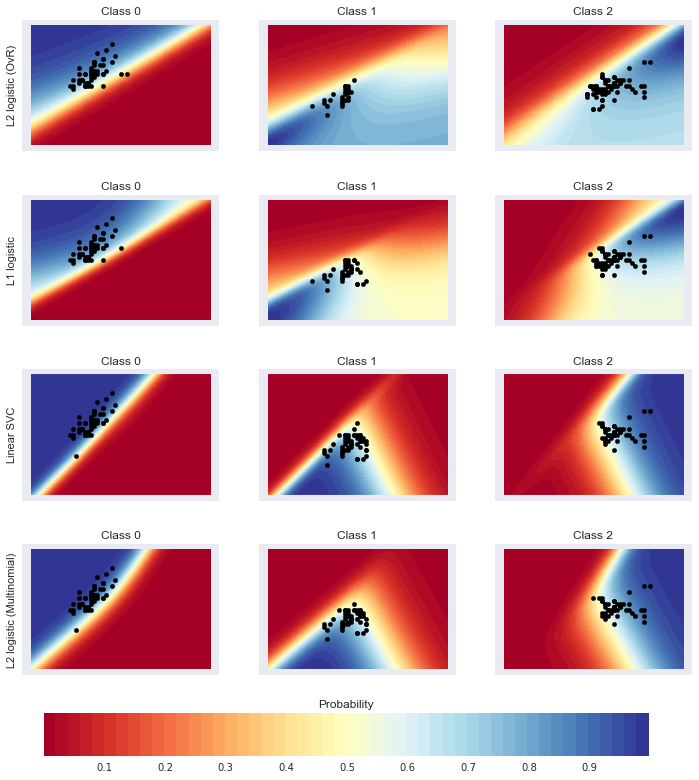

In [19]:
fig = plt.figure(figsize=(12,12), dpi=300)

for index, (name, clf) in enumerate(clfs.items()):
    #訓練並計算分類成功率
    #然而此範例訓練跟測試用相同資料集，並不符合實際狀況。
    #建議採用之後的cross_validation的方式才能較正確評估
    clf.fit(X, y)
    y_pred = clf.predict(X)
    clf_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, clf_rate))

    # 用網狀格技巧來視覺化分類器結果
    probas = clf.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_clfs, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)), extent=(3, 9, 1, 5), origin='lower',cmap=plt.cm.get_cmap('RdYlBu', 50))
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k', cmap=plt.cm.get_cmap('RdYlBu', 50))

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()